

> Indented block
# Import Tensor flow

In [ ]:
import tensorflow as tf
# tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)
# print('Using TensorFlow version', tf__version__)

# The Data set
### Import Data Set from mnist library

In [ ]:
from tensorflow.keras.datasets import mnist #Forget about the error it is a minor issure
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###Shapes of Imported Array


In [ ]:
print("x_Train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_Train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


###Plot an Image from data set


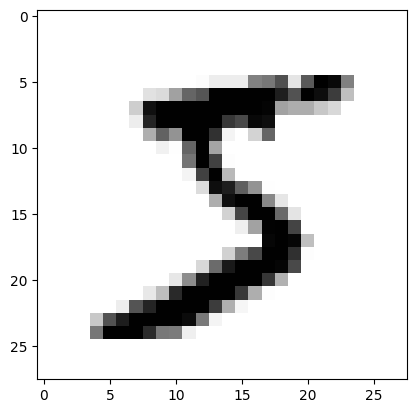

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap="binary")
plt.show()

###Displaying Training DataSet labels


In [ ]:
y_train[0]

5

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding
#### Import Data Set from mnist library
####After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

#####original label -> one-hot encoded label |\n",

#### 5 ->     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#### 7 ->    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
#### 1->     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


###Encoding Labels


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

###Validating Shapes of test Data


In [ ]:
print("y_train_encoded", y_train_encoded)
print("y_test_encoded", y_test_encoded)

y_train_encoded [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
y_test_encoded [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###Display Encoded Labels


In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Task 4 : Neural Networks


#Task 5: Preprocessing the Examples
##Unrolling Ndimensional Array to Vectors


In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))
print("x_train_reshaped", x_train_reshaped)
print("x_test_reshaped", x_test_reshaped)

x_train_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
x_test_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###Display Pixel Value



In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


###Data Normalization
#####Data is being normalized to allow efficient computing on the pixel values, this was done by reducing the scale and distribution of the values


In [ ]:
import numpy as np
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon) # Adding epsilon reduces the unstability in the computation of data

# We used the same mean an standard deviation for the test set and training set in order to remove unecessary bias
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


###Display Normalized Data


In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6 : Creating A model


###The first step in the node is the linear sum of the inputs

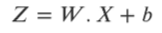

### The second step is processing output using an activation function
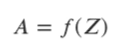


###Graphical representation of a node where the two operations are performed
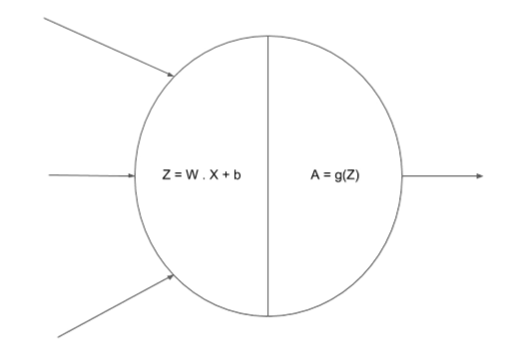
        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    # First Layer
    Dense(128, activation="relu", input_shape=(784,)),

    #Second Layer

    # relu: acts as a linear function for all positive values and set to zero for the other functions

    # softmax: gives the probability scores for various nodes, the class with the highest probability scores gives us our output

    Dense(128, activation="relu"), #Input shape does not need to be specified as it is implide in the firs layer

    #Third Layer
    Dense(10, activation="softmax")


])

###Compiling the Model

In [ ]:
model.compile(

    #Defines the optimizer algorithm
    optimizer="sgd",

    #This has to do with the difference between the model generated output and
    # the original output (loss should be minimized)
    loss='categorical_crossentropy',

    metrics = ['accuracy']

)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Training the Model

In [ ]:
model.fit(x_train_norm, y_train_encoded,epochs=3)#epochs has to do with the number of iterations to test the training data

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3754 - accuracy: 0.8894
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1856 - accuracy: 0.9456
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1417 - accuracy: 0.9582


###Evaluating the Model

In [ ]:
#uses the test data with the model and compares the predictions with the
#original y values
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Accuracy of model is" , accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9607
Accuracy of model is 96.069997549057


#Task8: Predicitions
##Predictions on Test Set


In [ ]:
preds = model.predict(x_test_norm)
print("Shape of preds" , preds)

313/313 [==============================] - 1s 2ms/step
Shape of preds [[4.1822036e-06 1.9443925e-07 1.7222250e-04 ... 9.9953085e-01
  1.7966031e-05 1.9369452e-05]
 [1.7609213e-04 2.7488667e-04 9.7888881e-01 ... 2.0274234e-07
  1.2562552e-04 3.7910610e-07]
 [3.7445764e-06 9.8990327e-01 2.1106116e-03 ... 2.2262172e-03
  1.6890947e-03 7.5978169e-05]
 ...
 [5.0764257e-08 3.2267709e-09 1.8068389e-06 ... 2.0713980e-05
  5.4720720e-05 6.9173874e-04]
 [3.3038465e-05 1.7269414e-04 1.3712665e-05 ... 6.3113971e-06
  2.1305336e-03 1.6060736e-06]
 [2.2161943e-05 4.5051991e-08 3.2895993e-04 ... 2.3946564e-08
  2.7370637e-08 5.4325227e-07]]


###Plotting the results

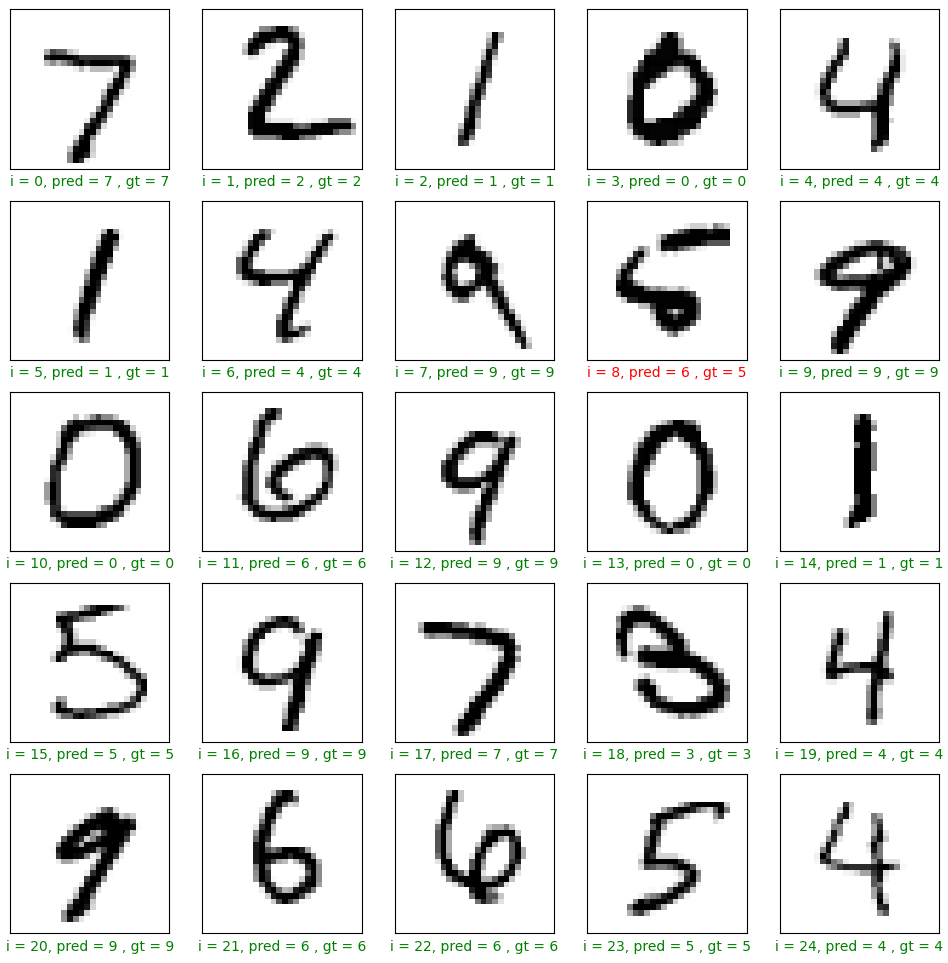

In [ ]:
 plt.figure(figsize = (12,12))
 start_index = 0

 for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i]) # predictions
    gt = y_test[start_index+i] # original y value

    col = "g"
    if pred != gt:
      col = "r"
    plt.xlabel("i = {}, pred = {} , gt = {}".format(start_index+i,pred,gt), color = col )
    plt.imshow(x_test[start_index+i], cmap="binary")

plt.show()



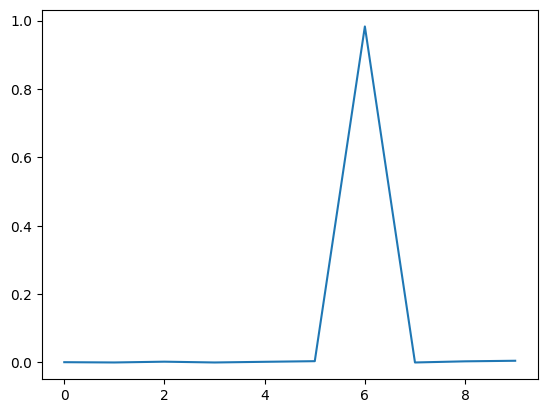

In [ ]:
plt.plot(preds[8])
plt.show()